In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def repeats(df, column_name):
    # Verificar si la columna existe en el DataFrame
    if column_name not in df.columns:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
        return
    
    # Convertir la columna al tipo de dato entero (si es posible)
    try:
        df[column_name] = df[column_name].astype(int)
    except ValueError:
        print(f"No se pudo convertir la columna '{column_name}' a tipo de dato entero.")
        return
    
    # Contar la frecuencia de cada valor en la columna
    counts = df[column_name].value_counts()
    # Seleccionar los valores que se repiten
    repeated_values = counts[counts > 1].index.tolist()
    
    if not repeated_values:
        print(f"No hay valores repetidos en la columna '{column_name}'.")
        return
    
    # Imprimir información de los valores repetidos
    print(f"Valores repetidos en la columna '{column_name}':")
    for value in repeated_values:
        # Encontrar las filas que contienen el valor repetido
        rows = df.index[df[column_name] == value].tolist()
        print(f"  Valor '{value}' se repite {counts[value]} veces en las filas {rows}")

***

***

In [3]:
df_clubs = pd.read_csv('./Data/liga brasil/clubs.csv')
df_clubs.head()

,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,code,name,club_id
0,95.65,29,27.9,9,0.310,5,Estádio Beira-Rio,50848,4.09,sc-internacional-porto-alegre,Sport Club Internacional,6600
1,109.95,35,27.9,4,0.114,2,Estádio Jornalista Mário Filho,82238,4.72,fluminense-rio-de-janeiro,Fluminense Football Club,2462
2,35.45,38,27.0,8,0.211,3,Estádio Urbano Caldeira,16068,42.33,fc-santos,Santos FC,221
3,69.90,35,26.7,10,0.286,4,Estádio Olímpico Nilton Santos,46931,14.33,botafogo-rio-de-janeiro,Botafogo de Futebol e Regatas,537
4,109.30,34,24.8,6,0.176,2,Neo Química Arena,49205,38.03,corinthians-sao-paulo,Sport Club Corinthians Paulista,199


In [4]:
df_clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_market_value     20 non-null     float64
 1   squad_size             20 non-null     int64  
 2   average_age            20 non-null     float64
 3   foreigners_number      20 non-null     int64  
 4   foreigners_percentage  20 non-null     float64
 5   national_team_players  20 non-null     int64  
 6   stadium_name           20 non-null     object 
 7   stadium_seats          20 non-null     int64  
 8   net_transfer_record    20 non-null     float64
 9   code                   20 non-null     object 
 10  name                   20 non-null     object 
 11  club_id                20 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 2.0+ KB


Valores que se repiten por columna

In [5]:
repeats(df_clubs,'club_id')

No hay valores repetidos en la columna 'club_id'.


In [6]:
# Seleccionar las columnas con datos numéricos
numeric_columns = df_clubs.select_dtypes(include='number')

# Imprimir el valor máximo y mínimo de cada columna numérica
for column in numeric_columns.columns:
    max_value = numeric_columns[column].max()
    min_value = numeric_columns[column].min()
    print(f'Columna {column}:')
    print(f'  Valor máximo: {max_value}')
    print(f'  Valor mínimo: {min_value}')

Columna total_market_value:
  Valor máximo: 219.95
  Valor mínimo: 14.65
Columna squad_size:
  Valor máximo: 38
  Valor mínimo: 27
Columna average_age:
  Valor máximo: 28.3
  Valor mínimo: 24.1
Columna foreigners_number:
  Valor máximo: 10
  Valor mínimo: 1
Columna foreigners_percentage:
  Valor máximo: 0.31
  Valor mínimo: 0.03
Columna national_team_players:
  Valor máximo: 9
  Valor mínimo: 0
Columna stadium_seats:
  Valor máximo: 82238
  Valor mínimo: 14525
Columna net_transfer_record:
  Valor máximo: 995.0
  Valor mínimo: 0.0
Columna club_id:
  Valor máximo: 28022
  Valor mínimo: 199


***

***

In [7]:
df_game_lineups = pd.read_csv('./Data/liga brasil/game_lineups.csv')
df_game_lineups.head()

,player_number,player_name,is_team_captain,position,club,formation,game_id,player_id
0,1,Bento,0,Goalkeeper,home,4-2-3-1,4316294,691906
1,15,Mateo Gamarra,0,Centre-Back,home,4-2-3-1,4316294,661245
2,4,Kaique Rocha,0,Centre-Back,home,4-2-3-1,4316294,633377
3,37,Lucas Esquivel,0,Left-Back,home,4-2-3-1,4316294,829969
4,29,Leonardo Godoy,0,Right-Back,home,4-2-3-1,4316294,369556


In [8]:
df_game_lineups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_number    2380 non-null   int64 
 1   player_name      2380 non-null   object
 2   is_team_captain  2380 non-null   int64 
 3   position         2380 non-null   object
 4   club             2380 non-null   object
 5   formation        2380 non-null   object
 6   game_id          2380 non-null   int64 
 7   player_id        2380 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 148.9+ KB


In [9]:
# Seleccionar las columnas con datos numéricos
numeric_columns = df_game_lineups.select_dtypes(include='number')

# Imprimir el valor máximo y mínimo de cada columna numérica
for column in numeric_columns.columns:
    max_value = numeric_columns[column].max()
    min_value = numeric_columns[column].min()
    print(f'Columna {column}:')
    print(f'  Valor máximo: {max_value}')
    print(f'  Valor mínimo: {min_value}')

Columna player_number:
  Valor máximo: 99
  Valor mínimo: 1
Columna is_team_captain:
  Valor máximo: 1
  Valor mínimo: 0
Columna game_id:
  Valor máximo: 4316315
  Valor mínimo: 4316187
Columna player_id:
  Valor máximo: 1260621
  Valor mínimo: 10471


***

***

In [10]:
df_games = pd.read_csv('./Data/liga brasil/games.csv')
df_games.head()

,game_id,home_club_position,away_club_position,result,matchday,date,stadium,attendance,referee,home_manager,away_manager,home_club_id,away_club_id
0,4316187,5,18,"(2, 1)",1,2024-04-13,Estádio Beira-Rio,22045,Rodrigo Jose Pereira de Lima,Eduardo Coudet,Rogério Ceni,6600,10010
1,4316310,3,16,"(2, 0)",6,2024-05-11,Estádio Jornalista Mário Filho,56829,Ramon Abatti,Tite,Toni Oliveira,614,199
2,4316295,20,6,"(0, 2)",5,2024-05-05,Arena Pantanal,10781,Bruno Arleu de Araújo,Ricardo Colbachini,Abel Ferreira,28022,1023
3,4316291,3,2,"(1, 2)",5,2024-05-05,Estádio Olímpico Nilton Santos,22685,Rafael Rodrigo Klein,Artur Jorge,Rogério Ceni,537,10010
4,4316294,1,17,"(1, 0)",5,2024-05-05,Ligga Arena,31192,Anderson Daronco,Cuca,Rafael Paiva,679,978


In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   game_id             52 non-null     int64 
 1   home_club_position  52 non-null     int64 
 2   away_club_position  52 non-null     int64 
 3   result              52 non-null     object
 4   matchday            52 non-null     int64 
 5   date                52 non-null     object
 6   stadium             52 non-null     object
 7   attendance          52 non-null     int64 
 8   referee             52 non-null     object
 9   home_manager        52 non-null     object
 10  away_manager        52 non-null     object
 11  home_club_id        52 non-null     int64 
 12  away_club_id        52 non-null     int64 
dtypes: int64(7), object(6)
memory usage: 5.4+ KB


In [12]:
repeats(df_games,'game_id')

No hay valores repetidos en la columna 'game_id'.


In [13]:
# Seleccionar las columnas con datos numéricos
numeric_columns = df_games.select_dtypes(include='number')

# Imprimir el valor máximo y mínimo de cada columna numérica
for column in numeric_columns.columns:
    max_value = numeric_columns[column].max()
    min_value = numeric_columns[column].min()
    print(f'Columna {column}:')
    print(f'  Valor máximo: {max_value}')
    print(f'  Valor mínimo: {min_value}')

Columna game_id:
  Valor máximo: 4316315
  Valor mínimo: 4316187
Columna home_club_position:
  Valor máximo: 20
  Valor mínimo: 1
Columna away_club_position:
  Valor máximo: 20
  Valor mínimo: 1
Columna matchday:
  Valor máximo: 6
  Valor mínimo: 1
Columna attendance:
  Valor máximo: 56829
  Valor mínimo: 5032
Columna home_club_id:
  Valor máximo: 28022
  Valor mínimo: 199
Columna away_club_id:
  Valor máximo: 28022
  Valor mínimo: 199


***

***

In [14]:
df_players = pd.read_csv('./Data/liga brasil/players.csv')
df_players.head()

,name,number,date_of_birth,age,height,citizenship,position,foot,joined,contract_expires,outfitter,player_id,club_id,country_of_birth,city_of_birth
0,rene,6,1992-09-14,31,1.74,Brazil,Defender - Left-Back,left,2022-04-11,2024-12-31,adidas,212209,6600,Brazil,Picos
1,joao dalla corte,0,2006-06-07,17,1.78,Brazil,Defender - Centre-Back,left,2024-01-01,2025-12-31,NaN,1004735,6600,Brazil,Encruzilhada do Sul
2,dalbert,29,1993-09-08,30,1.81,Brazil,Defender - Left-Back,left,2024-04-17,2024-12-31,NaN,312862,6600,Brazil,Barra Mansa
3,felipe motta,52,2003-08-03,20,1.87,Brazil,Defender - Centre-Back,NaN,2024-02-23,2025-06-30,NaN,1083638,6600,Brazil,Rio de Janeiro
4,igor gomes,3,2001-03-06,23,1.85,Brazil,Defender - Centre-Back,right,2022-08-05,2024-12-31,Nike,689640,6600,Brazil,Barra Mansa


In [15]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1080 non-null   object 
 1   number            1080 non-null   int64  
 2   date_of_birth     1080 non-null   object 
 3   age               1080 non-null   int64  
 4   height            1028 non-null   float64
 5   citizenship       1080 non-null   object 
 6   position          1080 non-null   object 
 7   foot              1017 non-null   object 
 8   joined            1008 non-null   object 
 9   contract_expires  900 non-null    object 
 10  outfitter         590 non-null    object 
 11  player_id         1080 non-null   int64  
 12  club_id           1080 non-null   int64  
 13  country_of_birth  1009 non-null   object 
 14  city_of_birth     1009 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 126.7+ KB


In [16]:
repeats(df_players,'player_id')

Valores repetidos en la columna 'player_id':
  Valor '212209' se repite 2 veces en las filas [0, 656]
  Valor '89701' se repite 2 veces en las filas [31, 646]
  Valor '982551' se repite 2 veces en las filas [23, 639]
  Valor '104505' se repite 2 veces en las filas [24, 641]
  Valor '678439' se repite 2 veces en las filas [25, 640]
  Valor '552242' se repite 2 veces en las filas [26, 643]
  Valor '689507' se repite 2 veces en las filas [27, 642]
  Valor '257740' se repite 2 veces en las filas [28, 645]
  Valor '277335' se repite 2 veces en las filas [29, 644]
  Valor '815384' se repite 2 veces en las filas [30, 647]
  Valor '103674' se repite 2 veces en las filas [32, 649]
  Valor '982552' se repite 2 veces en las filas [21, 638]
  Valor '689505' se repite 2 veces en las filas [33, 650]
  Valor '687359' se repite 2 veces en las filas [34, 648]
  Valor '213606' se repite 2 veces en las filas [36, 652]
  Valor '275381' se repite 2 veces en las filas [37, 653]
  Valor '102740' se repite 2 

In [17]:
df_players[df_players['player_id'] == 560417]

,name,number,date_of_birth,age,height,citizenship,position,foot,joined,contract_expires,outfitter,player_id,club_id,country_of_birth,city_of_birth
15,alemao,14,1998-04-01,26,1.82,Brazil,Attack - Centre-Forward,right,2023-07-17,2024-06-30,Nike,560417,6600,Brazil,Campo Erê
630,alemao,14,1998-04-01,26,1.82,Brazil,Attack - Centre-Forward,right,2023-07-17,2024-06-30,Nike,560417,6600,Brazil,Campo Erê


In [18]:
df_players[df_players['player_id'] == 89701]

,name,number,date_of_birth,age,height,citizenship,position,foot,joined,contract_expires,outfitter,player_id,club_id,country_of_birth,city_of_birth
31,charles aranguiz,20,1989-04-17,35,1.71,Chile,Midfield - Central Midfield,right,2023-04-02,2025-06-30,Nike,89701,6600,Chile,Puente Alto
646,charles aranguiz,20,1989-04-17,35,1.71,Chile,Midfield - Central Midfield,right,2023-04-02,2025-06-30,Nike,89701,6600,Chile,Puente Alto


In [19]:
df_players[df_players['player_id'] == 982551]

,name,number,date_of_birth,age,height,citizenship,position,foot,joined,contract_expires,outfitter,player_id,club_id,country_of_birth,city_of_birth
23,allison,42,2002-02-07,22,1.77,Brazil,Midfield - Attacking Midfield,right,2023-01-31,2026-06-30,NaN,982551,6600,Brazil,São Leopoldo
639,allison,42,2002-02-07,22,1.77,Brazil,Midfield - Attacking Midfield,right,2023-01-31,2026-06-30,NaN,982551,6600,Brazil,São Leopoldo


In [20]:
df_players[df_players['player_id'] == 104505]

,name,number,date_of_birth,age,height,citizenship,position,foot,joined,contract_expires,outfitter,player_id,club_id,country_of_birth,city_of_birth
24,alan patrick,10,1991-05-13,33,1.77,Brazil,Midfield - Attacking Midfield,right,2022-04-11,2026-12-31,adidas,104505,6600,Brazil,São Paulo
641,alan patrick,10,1991-05-13,33,1.77,Brazil,Midfield - Attacking Midfield,right,2022-04-11,2026-12-31,adidas,104505,6600,Brazil,São Paulo


In [21]:
def mantener_primera_fila_valor_repetido(df, column_name):
    # Encuentra los índices de las filas duplicadas en la columna especificada
    duplicate_indices = df[df.duplicated(subset=[column_name], keep='first')].index
    
    # Elimina todas las filas duplicadas, excepto la primera ocurrencia
    df.drop(duplicate_indices[duplicate_indices != duplicate_indices[0]], inplace=True)


In [22]:
# Llama a la función para eliminar la siguiente fila de cada valor repetido en la columna 'B'
mantener_primera_fila_valor_repetido(df_players, 'player_id')

In [23]:
repeats(df_players,'player_id')

Valores repetidos en la columna 'player_id':
  Valor '560417' se repite 2 veces en las filas [15, 630]


In [24]:
df_players[df_players['player_id'] == 560417]

,name,number,date_of_birth,age,height,citizenship,position,foot,joined,contract_expires,outfitter,player_id,club_id,country_of_birth,city_of_birth
15,alemao,14,1998-04-01,26,1.82,Brazil,Attack - Centre-Forward,right,2023-07-17,2024-06-30,Nike,560417,6600,Brazil,Campo Erê
630,alemao,14,1998-04-01,26,1.82,Brazil,Attack - Centre-Forward,right,2023-07-17,2024-06-30,Nike,560417,6600,Brazil,Campo Erê


In [25]:
# Eliminar la fila según el índice
df_players = df_players.drop(630)

# Resetear el índice del DataFrame
df_players = df_players.reset_index(drop=True)

In [26]:
df_players[df_players['player_id'] == 560417]

,name,number,date_of_birth,age,height,citizenship,position,foot,joined,contract_expires,outfitter,player_id,club_id,country_of_birth,city_of_birth
15,alemao,14,1998-04-01,26,1.82,Brazil,Attack - Centre-Forward,right,2023-07-17,2024-06-30,Nike,560417,6600,Brazil,Campo Erê


In [27]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1039 non-null   object 
 1   number            1039 non-null   int64  
 2   date_of_birth     1039 non-null   object 
 3   age               1039 non-null   int64  
 4   height            987 non-null    float64
 5   citizenship       1039 non-null   object 
 6   position          1039 non-null   object 
 7   foot              977 non-null    object 
 8   joined            967 non-null    object 
 9   contract_expires  860 non-null    object 
 10  outfitter         563 non-null    object 
 11  player_id         1039 non-null   int32  
 12  club_id           1039 non-null   int64  
 13  country_of_birth  968 non-null    object 
 14  city_of_birth     968 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(10)
memory usage: 117.8+ KB


In [28]:
# Calcular el promedio de height por club_id
avg_height_by_club = df_players.groupby('club_id')['height'].transform('mean')

# Completar los valores nulos en la columna height con los promedios calculados
df_players['height'].fillna(avg_height_by_club, inplace=True)

C:\Users\Guille\AppData\Local\Temp\ipykernel_21208\1226349493.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_players['height'].fillna(avg_height_by_club, inplace=True)


Text(0, 0.5, 'Cantidad')

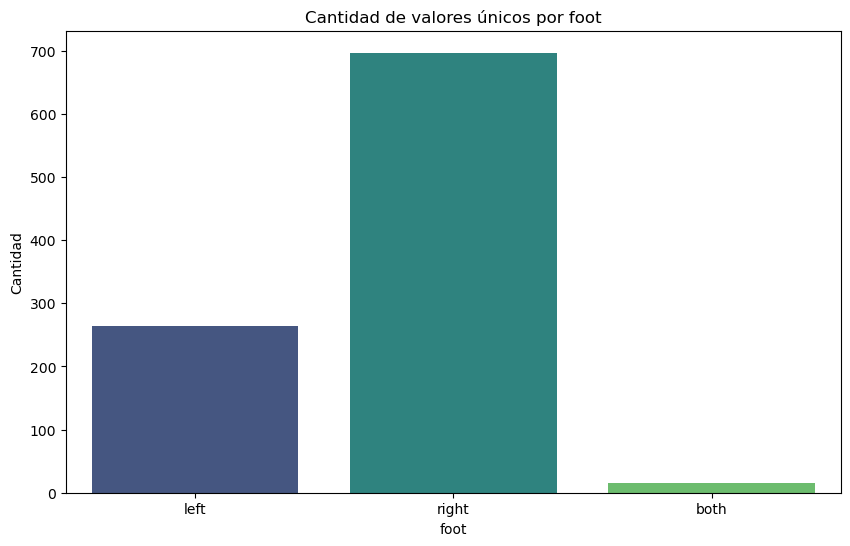

In [29]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='foot', data=df_players, palette='viridis')

# Añadir título y etiquetas
plt.title('Cantidad de valores únicos por foot')
plt.xlabel('foot')
plt.ylabel('Cantidad')

In [30]:
df_players['foot'].fillna('right', inplace=True)

C:\Users\Guille\AppData\Local\Temp\ipykernel_21208\3907491108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_players['foot'].fillna('right', inplace=True)


In [31]:
# Seleccionar las columnas con datos numéricos
numeric_columns = df_players.select_dtypes(include='number')

# Imprimir el valor máximo y mínimo de cada columna numérica
for column in numeric_columns.columns:
    max_value = numeric_columns[column].max()
    min_value = numeric_columns[column].min()
    print(f'Columna {column}:')
    print(f'  Valor máximo: {max_value}')
    print(f'  Valor mínimo: {min_value}')

Columna number:
  Valor máximo: 99
  Valor mínimo: 0
Columna age:
  Valor máximo: 43
  Valor mínimo: 17
Columna height:
  Valor máximo: 2.04
  Valor mínimo: 1.6
Columna player_id:
  Valor máximo: 1196689
  Valor mínimo: 13835
Columna club_id:
  Valor máximo: 28022
  Valor mínimo: 199


***

***

In [32]:
df_events = pd.read_csv('./Data/liga brasil/game_events.csv')
df_events.head()

,type,minute,game_id,player_id,club_id,description,player_in,player_assist
0,Goals,70,4316187,875328,10010,", Right-footed shot, 1. Goal of the Season Ass...",0,578872
1,Goals,72,4316187,674732,6600,", Left-footed shot, 1. Goal of the Season",0,0
2,Goals,83,4316187,51174,6600,", Header, 1. Goal of the Season Assist: , Corn...",0,277335
3,Substitutions,46,4316187,982549,6600,", Tactical",674732,0
4,Substitutions,46,4316187,388266,10010,", Tactical",162812,0


In [33]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   type           940 non-null    object
 1   minute         940 non-null    int64 
 2   game_id        940 non-null    int64 
 3   player_id      940 non-null    int64 
 4   club_id        940 non-null    int64 
 5   description    940 non-null    object
 6   player_in      940 non-null    int64 
 7   player_assist  940 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 58.9+ KB


In [34]:
# Seleccionar las columnas con datos numéricos
numeric_columns = df_events.select_dtypes(include='number')

# Imprimir el valor máximo y mínimo de cada columna numérica
for column in numeric_columns.columns:
    max_value = numeric_columns[column].max()
    min_value = numeric_columns[column].min()
    print(f'Columna {column}:')
    print(f'  Valor máximo: {max_value}')
    print(f'  Valor mínimo: {min_value}')

Columna minute:
  Valor máximo: 90
  Valor mínimo: 1
Columna game_id:
  Valor máximo: 4316315
  Valor mínimo: 4316187
Columna player_id:
  Valor máximo: 1119009
  Valor mínimo: 18829
Columna club_id:
  Valor máximo: 28022
  Valor mínimo: 199
Columna player_in:
  Valor máximo: 1226150
  Valor mínimo: 0
Columna player_assist:
  Valor máximo: 1084714
  Valor mínimo: 0
